### Step1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step2. Creating & Reading the data

In [22]:
df=pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Python\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step3. Check if there are missing values. If yes, handle them.

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

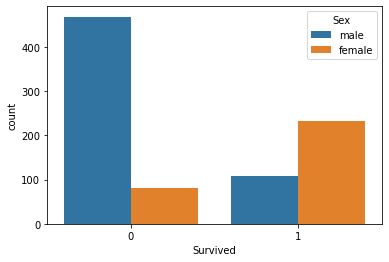

In [4]:
sns.countplot(x="Survived",hue="Sex",data=df)

### Step4. Data Exploration 

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
corr_df=df.corr()
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


<AxesSubplot:>

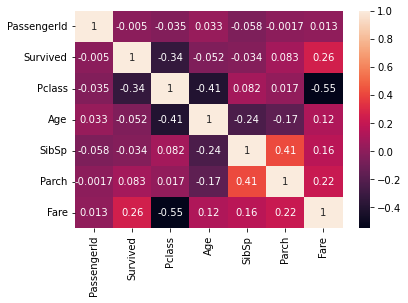

In [19]:
sns.heatmap(data=corr_df,annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

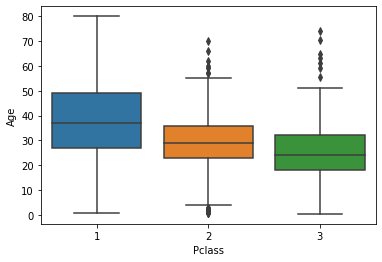

In [7]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [24]:
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [25]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df.drop("Cabin",inplace=True,axis=1)

In [38]:
df.drop(["Name","Ticket","Age"],axis=1,inplace=True)

In [29]:
df.dropna(inplace=True)

In [51]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1,0,7.2500,2
1,2,1,1,0,1,0,71.2833,0
2,3,1,3,0,0,0,7.9250,2
3,4,1,1,0,1,0,53.1000,2
4,5,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,13.0000,2
887,888,1,1,0,0,0,30.0000,2
888,889,0,3,0,1,2,23.4500,2
889,890,1,1,1,0,0,30.0000,0


### Step5. Creating X & Y

In [49]:
X=df[["PassengerId","Pclass","Sex","SibSp","Parch","Fare","Embarked"]]
Y=df["Survived"]

In [50]:
print(X.shape)
print(Y.shape)

(889, 7)
(889,)


### Scaling the data

In [56]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X = scaler.fit_transform(X)

print(X)

[[-1.73250451  0.82520863  0.73534203 ... -0.47432585 -0.50023975
   0.58683958]
 [-1.72861124 -1.57221121 -1.35991138 ... -0.47432585  0.78894661
  -1.93955453]
 [-1.72471797  0.82520863 -1.35991138 ... -0.47432585 -0.48664993
   0.58683958]
 ...
 [ 1.72471797  0.82520863 -1.35991138 ...  2.00611934 -0.17408416
   0.58683958]
 [ 1.72861124 -1.57221121  0.73534203 ... -0.47432585 -0.0422126
  -1.93955453]
 [ 1.73250451  0.82520863  0.73534203 ... -0.47432585 -0.49017322
  -0.67635748]]


### Step6. Shuffle and Split Data

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [58]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(711, 7)
(711,)
(178, 7)
(178,)


# Creating the model

In [62]:
from sklearn.linear_model import LogisticRegression

cf=LogisticRegression()
cf.fit(X_train,Y_train)

LogisticRegression()

In [63]:
Y_pred=cf.predict(X_test)
print(Y_pred)

[1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0]


In [64]:
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1),

In [78]:
cf.coef_

array([[ 0.04111716, -0.68932417, -1.30450726, -0.25848899, -0.09703409,
         0.05674745, -0.21673   ]])

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[101  14]
 [ 18  45]]
classification report
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       115
           1       0.76      0.71      0.74        63

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178

Accuracy of the model: 0.8202247191011236


In [80]:
#this is the matrix we used to change the threshold
y_pred_prob = cf.predict_proba(X_test)
print(y_pred_prob)

[[0.18894053 0.81105947]
 [0.46876371 0.53123629]
 [0.89278801 0.10721199]
 [0.05152118 0.94847882]
 [0.82246507 0.17753493]
 [0.81400291 0.18599709]
 [0.29142795 0.70857205]
 [0.22970529 0.77029471]
 [0.86104701 0.13895299]
 [0.79326069 0.20673931]
 [0.47658847 0.52341153]
 [0.18735061 0.81264939]
 [0.93504445 0.06495555]
 [0.8666625  0.1333375 ]
 [0.92720572 0.07279428]
 [0.89591146 0.10408854]
 [0.08416689 0.91583311]
 [0.91155854 0.08844146]
 [0.89519797 0.10480203]
 [0.6045161  0.3954839 ]
 [0.90006799 0.09993201]
 [0.82526469 0.17473531]
 [0.0542239  0.9457761 ]
 [0.78769744 0.21230256]
 [0.89281711 0.10718289]
 [0.88792869 0.11207131]
 [0.26585209 0.73414791]
 [0.89274658 0.10725342]
 [0.8624594  0.1375406 ]
 [0.07165643 0.92834357]
 [0.05095258 0.94904742]
 [0.30053384 0.69946616]
 [0.06989852 0.93010148]
 [0.40900428 0.59099572]
 [0.3099028  0.6900972 ]
 [0.89066698 0.10933302]
 [0.21655058 0.78344942]
 [0.76949379 0.23050621]
 [0.81652374 0.18347626]
 [0.89362562 0.10637438]


In [81]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 35  , type 2 error : 17  , type 1 error: 18
Errors at threshold  0.41000000000000003 : 35  , type 2 error : 17  , type 1 error: 18
Errors at threshold  0.42000000000000004 : 35  , type 2 error : 17  , type 1 error: 18
Errors at threshold  0.43000000000000005 : 34  , type 2 error : 17  , type 1 error: 17
Errors at threshold  0.44000000000000006 : 34  , type 2 error : 17  , type 1 error: 17
Errors at threshold  0.45000000000000007 : 33  , type 2 error : 17  , type 1 error: 16
Errors at threshold  0.4600000000000001 : 33  , type 2 error : 17  , type 1 error: 16
Errors at threshold  0.4700000000000001 : 31  , type 2 error : 17  , type 1 error: 14
Errors at threshold  0.4800000000000001 : 32  , type 2 error : 18  , type 1 error: 14
Errors at threshold  0.4900000000000001 : 32  , type 2 error : 18  , type 1 error: 14
Errors at threshold  0.5000000000000001 : 32  , type 2 error : 18  , type 1 error: 14
Errors at threshold  0.5100000000000001 : 32  , type 2 error : 1

In [82]:
y_pred_class = []
for values in y_pred_prob[:,1]:
    if values > 0.47:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report")

print(classification_report(Y_test,y_pred_class))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[101  14]
 [ 18  45]]
classification report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       115
           1       0.77      0.73      0.75        63

    accuracy                           0.83       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178

Accuracy of the model: 0.8202247191011236
